In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


import scipy.stats as stats

In [2]:

def plot_hist_basic(df, col):
    """Return a Matplotlib axis object with a histogram of the data in col.
    Plots a histogram from the column col of dataframe df.
    Parameters
    ----------
    df: Pandas DataFrame
    col: str
        Column from df with numeric data to be plotted
    Returns
    -------
    ax: Matplotlib axis object
    """
    data = df[col]
    ax = data.hist(bins=20, normed=1, edgecolor='none', figsize=(10, 7), alpha=.5)
    ax.set_ylabel('Probability Density')
    ax.set_title(col)

    return ax


def plot_kde(df, col):
    """Fit a Gaussian KDE to input data, plot fit over histogram of the data.
    Parameters
    ----------
    df: Pandas DataFrame
    col: str
        Column from df with numeric data to be plotted
    Returns
    -------
    ax: Matplotlib axis object
    """
    ax = plot_hist_basic(df, col)
    data = df[col]
    density = stats.kde.gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 100)
    kde_vals = density(x_vals)

    ax.plot(x_vals, kde_vals, 'b-')

    return ax

In [3]:
# Read the data
df = pd.read_csv("Austin_Dockless_Vehicle_Trips.csv")


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746505 entries, 0 to 2746504
Data columns (total 20 columns):
ID                          object
Device ID                   object
Vehicle Type                object
Trip Duration               float64
Trip Distance               float64
Start Time                  object
End Time                    object
Modified Date               object
Month                       float64
Hour                        float64
Day of Week                 float64
Council District (Start)    float64
Council District (End)      float64
Origin Cell ID              object
Destination Cell ID         object
Year                        float64
Start Latitude              float64
Start Longitude             float64
End Latitude                float64
End Longitude               float64
dtypes: float64(12), object(8)
memory usage: 419.1+ MB


In [5]:
df.head(5)

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358.0,915.0,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6.0,17.0,5.0,5.0,9.0,013445,013916,2018.0,30.263,-97.762,30.259,-97.754
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226.0,839.0,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11.0,11.0,5.0,9.0,9.0,014556,015186,2018.0,30.283,-97.745,30.284,-97.737
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324.0,1206.0,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10.0,15.0,2.0,9.0,9.0,015344,015032,2018.0,30.285,-97.734,30.291,-97.738
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096.0,0.0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9.0,16.0,0.0,9.0,9.0,014707,014081,2018.0,30.268,-97.743,30.276,-97.752
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408.0,1144.0,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9.0,11.0,5.0,3.0,3.0,016114,015642,2018.0,30.242,-97.721,30.244,-97.729


In [6]:
df['Vehicle Type'].unique()

array(['scooter', 'bicycle', nan], dtype=object)

In [7]:
df.groupby(['Vehicle Type', 'Day of Week']).count()

ID  Device ID  Trip Duration  Trip Distance  \
Vehicle Type Day of Week                                                    
bicycle      0.0           11918      11918          11918          11918   
             1.0            9038       9038           9038           9038   
             2.0            9547       9547           9547           9547   
             3.0            9793       9793           9793           9793   
             4.0           10723      10723          10723          10723   
             5.0           12705      12705          12705          12705   
             6.0           14461      14461          14461          14461   
scooter      0.0          380376     380376         380376         380376   
             1.0          338692     338692         338692         338692   
             2.0          347537     347537         347537         347537   
             3.0          333112     333112         333112         333112   
             4.0          383855     383855         383855         383855   
             5.0          420283     420283         420283         420283   
             6.0          464464     464464         464464         464464   

                          Start Time  End Time  Modified Date   Month    Hour  \
Vehicle Type Day of Week                                                        
bicycle      0.0               11918     11918          11918   11918   11918   
             1.0                9038      9038           9038    9038    9038   
             2.0                9547      9547           9547    9547    9547   
             3.0                9793      9793           9793    9793    9793   
             4.0               10723     10723          10723   10723   10723   
             5.0               12705     12705          12705   12705   12705   
             6.0               14461     14461          14461   14461   14461   
scooter      0.0              380376    380376         380376  380376  380376   
             1.0              338692    338692         338692  338692  338692   
             2.0              347537    347537         347537  347537  347537   
             3.0              333112    333112         333112  333112  333112   
             4.0              383855    383855         383855  383855  383855   
             5.0              420283    420283         420283  420283  420283   
             6.0              464464    464464         464464  464464  464464   

                          Council District (Start)  Council District (End)  \
Vehicle Type Day of Week                                                     
bicycle      0.0                             11918                   11918   
             1.0                              9038                    9038   
             2.0                              9547                    9547   
             3.0                              9793                    9793   
             4.0                             10723                   10723   
             5.0                             12705                   12705   
             6.0                             14461                   14461   
scooter      0.0                            380376                  380376   
             1.0                            338692                  338692   
             2.0                            347537                  347537   
             3.0                            333112                  333112   
             4.0                            383855                  383855   
             5.0                            420252                  420252   
             6.0                            464464                  464464   

                          Origin Cell ID  Destination Cell ID    Year  \
Vehicle Type Day of Week                                                
bicycle      0.0                   11918                11918   11918   
             1.0                

In [8]:
df.groupby(['Vehicle Type', 'Month']).count()

ID  Device ID  Trip Duration  Trip Distance  \
Vehicle Type Month                                                    
bicycle      1.0      1654       1654           1654           1654   
             2.0       268        268            268            268   
             4.0        14         14             14             14   
             5.0         1          1              1              1   
             6.0         1          1              1              1   
             7.0      6890       6890           6890           6890   
             8.0     10561      10561          10561          10561   
             9.0     12474      12474          12474          12474   
             10.0    18317      18317          18317          18317   
             11.0    22432      22432          22432          22432   
             12.0     5573       5573           5573           5573   
scooter      1.0    315623     315623         315623         315623   
             2.0    128937     128937         128937         128937   
             4.0     57176      57176          57176          57176   
             5.0      9235       9235           9235           9235   
             6.0     72767      72767          72767          72767   
             7.0    122539     122539         122539         122539   
             8.0    322175     322175         322175         322175   
             9.0    382963     382963         382963         382963   
             10.0   488993     488993         488993         488993   
             11.0   411193     411193         411193         411193   
             12.0   356718     356718         356718         356718   

                    Start Time  End Time  Modified Date    Hour  Day of Week  \
Vehicle Type Month                                                             
bicycle      1.0          1654      1654           1654    1654         1654   
             2.0           268       268            268     268          268   
             4.0            14        14             14      14           14   
             5.0             1         1              1       1            1   
             6.0             1         1              1       1            1   
             7.0          6890      6890           6890    6890         6890   
             8.0         10561     10561          10561   10561        10561   
             9.0         12474     12474          12474   12474        12474   
             10.0        18317     18317          18317   18317        18317   
             11.0        22432     22432          22432   22432        22432   
             12.0         5573      5573           5573    5573         5573   
scooter      1.0        315623    315623         315623  315623       315623   
             2.0        128937    128937         128937  128937       128937   
             4.0         57176     57176          57176   57176        57176   
             5.0          9235      9235           9235    9235         9235   
             6.0         72767     72767          72767   72767        72767   
             7.0        122539    122539         122539  122539       122539   
             8.0        322175    322175         322175  322175       322175   
             9.0        382963    382963         382963  382963       382963   
             10.0       488993    488993         488993  488993       488993   
             11.0       411193    411193         411193  411193       411193   
             12.0       356718    356718         356718  356718       356718   

                    Council District (Start)  Council District (End)  \
Vehicle Type Month                                                     
bicycle      1.0                        1654                    1654   
             2.0                         268                     268   
             4.0                          14                      14   
             5.0                      

In [9]:
# plot data

df_1 = df[['Vehicle Type', 'Month', 'ID']]
df_1.groupby(['Vehicle Type', 'Month']).count()

# fig, ax = plt.subplots(figsize=(15,7))
# # # use unstack()
# df_1.groupby(['Vehicle Type', 'Month']).count().unstack().plot(ax=ax)



ID
Vehicle Type Month        
bicycle      1.0      1654
             2.0       268
             4.0        14
             5.0         1
             6.0         1
             7.0      6890
             8.0     10561
             9.0     12474
             10.0    18317
             11.0    22432
             12.0     5573
scooter      1.0    315623
             2.0    128937
             4.0     57176
             5.0      9235
             6.0     72767
             7.0    122539
             8.0    322175
             9.0    382963
             10.0   488993
             11.0   411193
             12.0   356718

In [10]:
df.groupby(['Vehicle Type', 'Hour', 'Day of Week']).count()

ID  Device ID  Trip Duration  Trip Distance  \
Vehicle Type Hour Day of Week                                                   
bicycle      0.0  0.0            522        522            522            522   
                  1.0            183        183            183            183   
                  2.0            137        137            137            137   
                  3.0            195        195            195            195   
                  4.0            203        203            203            203   
                  5.0            292        292            292            292   
                  6.0            452        452            452            452   
             1.0  0.0            432        432            432            432   
                  1.0            114        114            114            114   
                  2.0             90         90             90             90   
                  3.0            113        113            113            113   
                  4.0            127        127            127            127   
                  5.0            179        179            179            179   
                  6.0            366        366            366            366   
             2.0  0.0            415        415            415            415   
                  1.0             63         63             63             63   
                  2.0             46         46             46             46   
                  3.0             77         77             77             77   
                  4.0             86         86             86             86   
                  5.0            150        150            150            150   
                  6.0            353        353            353            353   
             3.0  0.0            142        142            142            142   
                  1.0             36         36             36             36   
                  2.0             16         16             16             16   
                  3.0             33         33             33             33   
                  4.0             44         44             44             44   
                  5.0             86         86             86             86   
                  6.0            118        118            118            118   
             4.0  0.0             63         63             63             63   
                  1.0             23         23             23             23   
...                              ...        ...            ...            ...   
scooter      19.0 5.0          26774      26774          26774          26774   
                  6.0          32153      32153          32153          32153   
             20.0 0.0          18880      18880          18880          18880   
                  1.0          17937      17937          17937          17937   
                  2.0          21172      21172          21172          21172   
                  3.0          19616      19616          19616          19616   
                  4.0          23198      23198          23198          23198   
                  5.0          25471      25471          25471          25471   
                  6.0          26128      26128          26128          26128   
             21.0 0.0           9491       9491           9491           9491   
                  1.0           9065       9065           9065           9065   
                  2.0          10191      10191          10191          10191   
                  3.0          10522      10522          10522          10522   
                  4.0          12105      12105          12105          12105   
                  5.0          14275      14275          14275          14275   
                  6.0          13654      13654          13654          13654   
             22.0 0.0           5208       5208           5208   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1134a2dd8>,
      dtype=object)

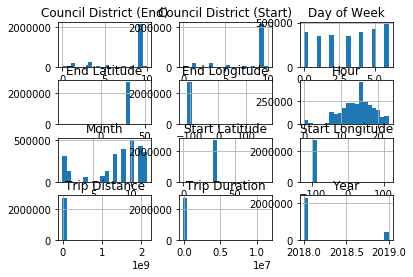

In [11]:
df.hist(bins=20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113d77b00>]],
      dtype=object)

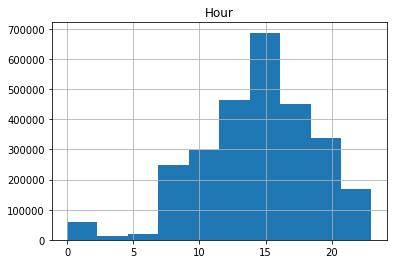

In [12]:
df.hist(column='Hour')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a156c2ef0>]],
      dtype=object)

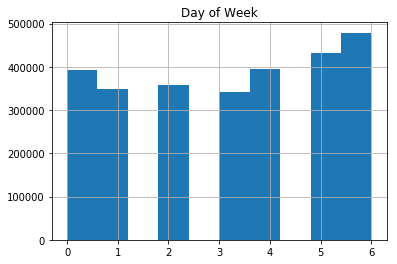

In [13]:
df.hist(column='Day of Week')

# Sunday is zero

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


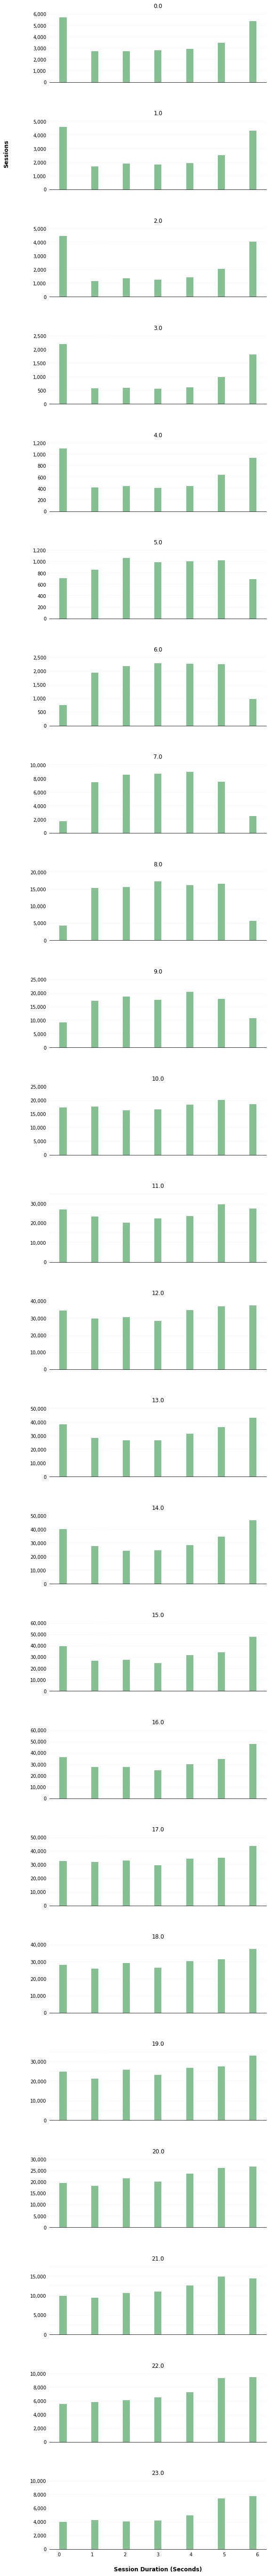

In [14]:
ax = df.hist(column='Day of Week', by='Hour', bins=25, grid=False, figsize=(8,100), layout=(24,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Sessions", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


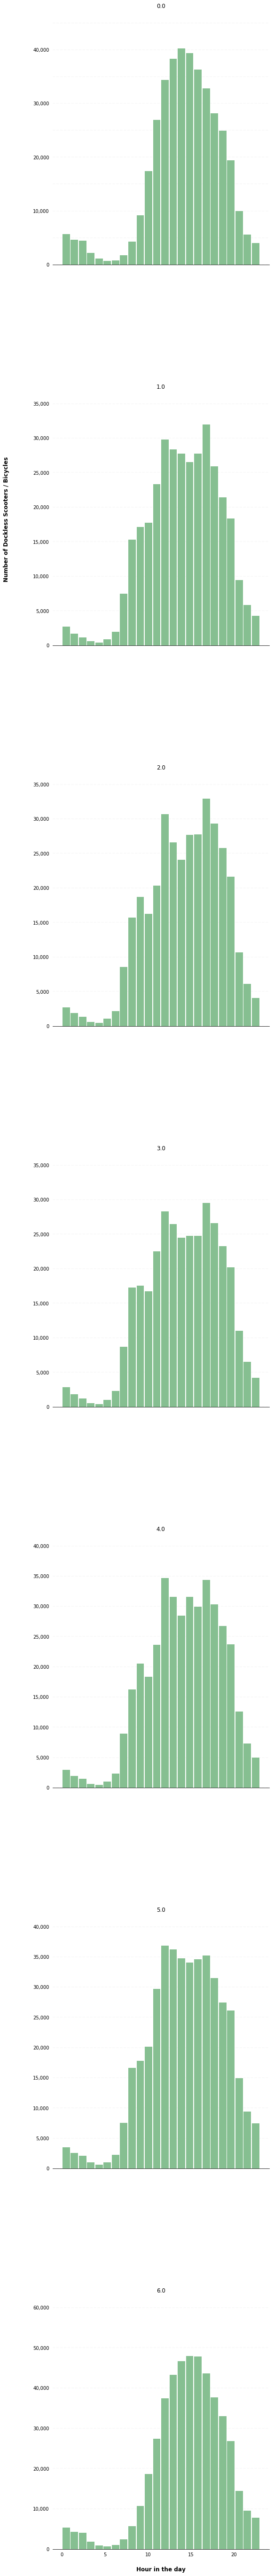

In [15]:
ax = df.hist(column='Hour', by='Day of Week', bins=24, grid=False, figsize=(8,100), layout=(7,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Hour in the day", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Number of Dockless Scooters / Bicycles ", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


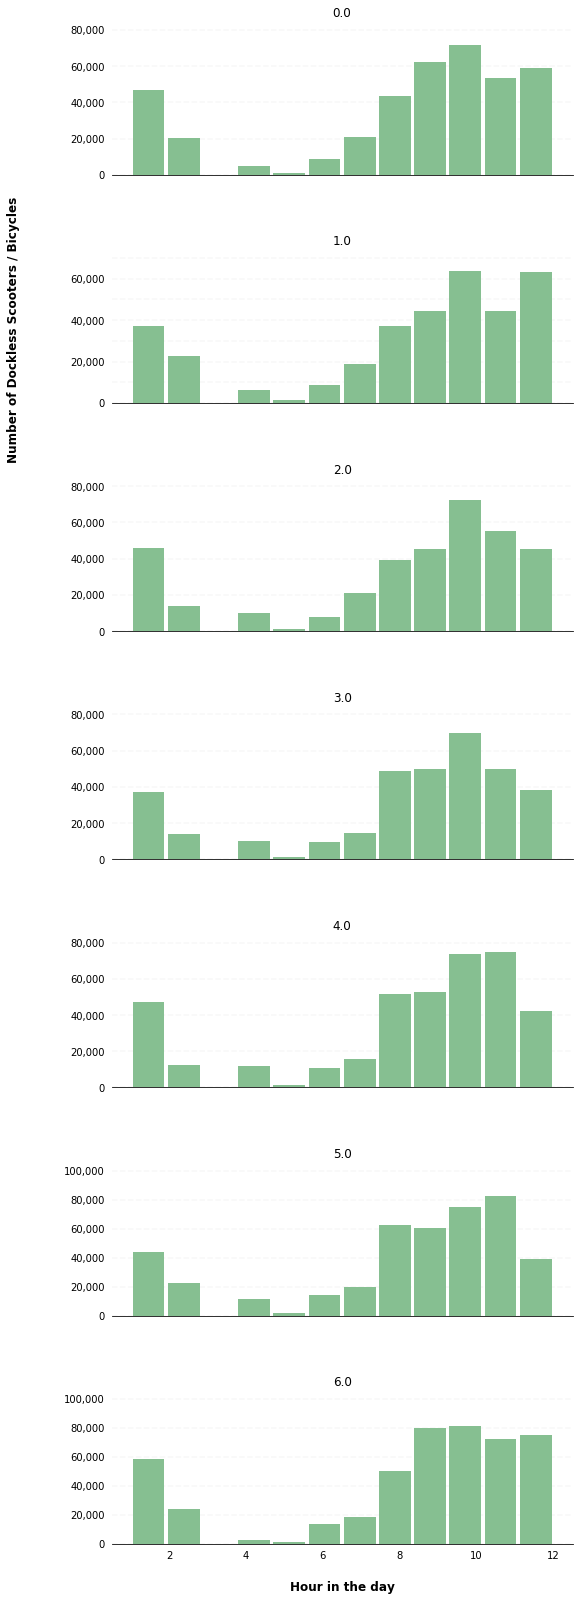

In [16]:
ax = df.hist(column='Month', by='Day of Week', bins=12, grid=False, figsize=(8,100), layout=(24,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Hour in the day", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Number of Dockless Scooters / Bicycles ", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [17]:
ax.size

24

In [18]:

sum(pd.isnull(df['Month']))

1

In [19]:
df[df['Month'].isnull()]

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
825895,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,NaN,NaN,NaN,NaN,NaN,12/13/2018 03:36:12 PM,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Gives all the nulls by column
'''
Write method to spew out statistics info 
Shape
head(5)
tail(5)
Info
Null Columns

'''

df.isnull().sum()

ID                              0
Device ID                       0
Vehicle Type                    1
Trip Duration                   1
Trip Distance                   1
Start Time                      1
End Time                        1
Modified Date                   0
Month                           1
Hour                            1
Day of Week                     1
Council District (Start)       31
Council District (End)         31
Origin Cell ID               2088
Destination Cell ID          2088
Year                            1
Start Latitude              32684
Start Longitude             32684
End Latitude                21812
End Longitude               21812
dtype: int64

In [21]:
# Drop the null column value 825895
df = df.drop([825895],axis=0)

In [22]:
df[df['Month'].isnull()]

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


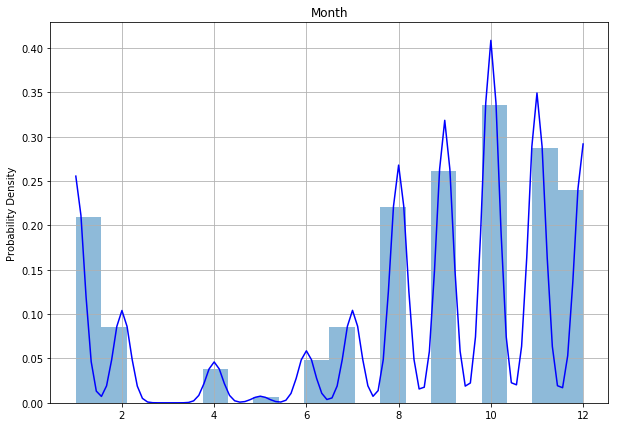

In [23]:
plot_kde(df,'Month')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


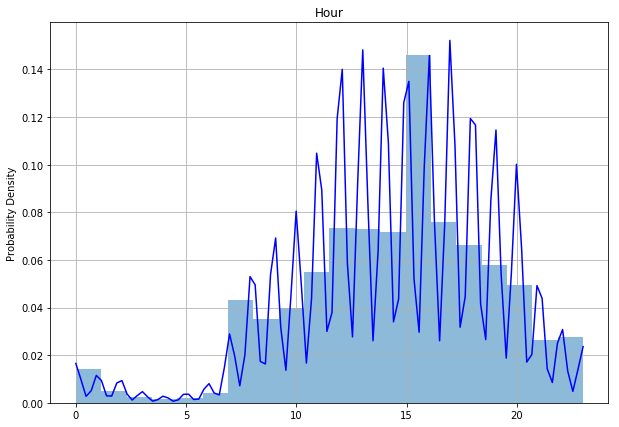

In [24]:
plot_kde(df,'Hour')

In [25]:
df['Year'].unique()

array([2018., 2019.])

In [26]:
df.groupby(['Year', 'Month']).count()

ID  Device ID  Vehicle Type  Trip Duration  Trip Distance  \
Year   Month                                                                  
2018.0 4.0     57190      57190         57190          57190          57190   
       5.0      9236       9236          9236           9236           9236   
       6.0     72768      72768         72768          72768          72768   
       7.0    129429     129429        129429         129429         129429   
       8.0    332736     332736        332736         332736         332736   
       9.0    395437     395437        395437         395437         395437   
       10.0   507310     507310        507310         507310         507310   
       11.0   433625     433625        433625         433625         433625   
       12.0   362291     362291        362291         362291         362291   
2019.0 1.0    317277     317277        317277         317277         317277   
       2.0    129205     129205        129205         129205         129205   

              Start Time  End Time  Modified Date    Hour  Day of Week  \
Year   Month                                                             
2018.0 4.0         57190     57190          57190   57190        57190   
       5.0          9236      9236           9236    9236         9236   
       6.0         72768     72768          72768   72768        72768   
       7.0        129429    129429         129429  129429       129429   
       8.0        332736    332736         332736  332736       332736   
       9.0        395437    395437         395437  395437       395437   
       10.0       507310    507310         507310  507310       507310   
       11.0       433625    433625         433625  433625       433625   
       12.0       362291    362291         362291  362291       362291   
2019.0 1.0        317277    317277         317277  317277       317277   
       2.0        129205    129205         129205  129205       129205   

              Council District (Start)  Council District (End)  \
Year   Month                                                     
2018.0 4.0                       57190                   57190   
       5.0                        9236                    9236   
       6.0                       72768                   72768   
       7.0                      129429                  129429   
       8.0                      332736                  332736   
       9.0                      395437                  395437   
       10.0                     507310                  507310   
       11.0                     433625                  433625   
       12.0                     362291                  362291   
2019.0 1.0                      317246                  317246   
       2.0                      129205                  129205   

              Origin Cell ID  Destination Cell ID  Start Latitude  \
Year   Month                                                        
2018.0 4.0             56240                56240           55639   
       5.0              9059                 9059            8937   
       6.0             72030                72030           71638   
       7.0            129406               129406          128596   
       8.0            332594               332594          331261   
       9.0            395436               395436          394118   
       10.0           507310               507310          497225   
       11.0           433625               433625          421082   
       12.0           362266               362266          359010   
2019.0 1.0            317246               317246          317110   
       2.0            129205               129205          129205   

              Start Longitude  End Latitude  End Longitude  
Year   Month                                                
2018.0 4.0              55639         55770          55770  
       5.0               8937          8938           8938  
       6.0              71

In [27]:
# Read the data
df_weather = pd.read_csv("1655644.csv")

FileNotFoundError: File b'1655644.csv' does not exist

In [ ]:
df_weather.head(5)

In [ ]:
df_weather.columns

In [ ]:
df2 = df_weather[['STATION','NAME','DATE','TAVG', 'PRCP','TMAX','TMIN','AWND']]

In [ ]:
df2.head(5)

In [ ]:
df_weather.isnull().sum()

In [ ]:
df_weather['DATE'].max()

In [ ]:
df_weather['DATE'].min()

In [ ]:
df_weather['TMAX'].max()